In [10]:
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 109ms/step - accuracy: 0.8544 - loss: 0.5231 - val_accuracy: 0.9807 - val_loss: 0.0623
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 91ms/step - accuracy: 0.9798 - loss: 0.0652 - val_accuracy: 0.9840 - val_loss: 0.0502
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.9873 - loss: 0.0414 - val_accuracy: 0.9894 - val_loss: 0.0323
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.97      

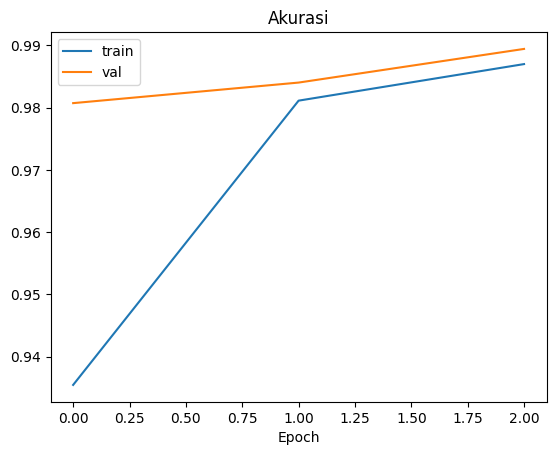

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train = x_train[..., None]
x_test = x_test[..., None]

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist_mnist = model.fit(x_train, y_train, epochs = 3, batch_size = 128, validation_data = (x_test, y_test))

# Evaluasi
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot Akurasi
plt.figure(); plt.plot(hist_mnist.history['accuracy']); plt.plot(hist_mnist.history['val_accuracy']); plt.title('Akurasi'); plt.xlabel('Epoch'); plt.legend(['train', 'val']); plt.show()

**Tugas: Ganti dataset ke Fashion-MNIST atau CIFAR-10, Bandingkan Metriknya**

Train data: (60000, 28, 28)
Test data: (10000, 28, 28)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 95ms/step - accuracy: 0.7133 - loss: 0.8359 - val_accuracy: 0.8438 - val_loss: 0.4394
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.8615 - loss: 0.3870 - val_accuracy: 0.8607 - val_loss: 0.3854
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.8763 - loss: 0.3416 - val_accuracy: 0.8760 - val_loss: 0.3436
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.87      0.80      1000
           3       0.90      0.88      0.89      1000
           4       0.82      0.77      0.79      1000
           5       0.99      0.94      0.96      1000
           6       0.70      0.63      0.66      1000
           7       0.92      0.95      0.94      1000
           8       0.93      0.98      0.95      1000
           9       0.94      0.

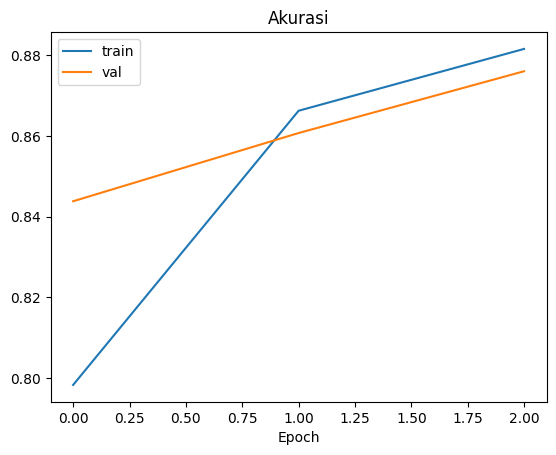

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Ambil dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Cek ukuran dataset
print("Train data:", x_train.shape)
print("Test data:", x_test.shape)

# Normalisasi (opsional)
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., None]
x_test = x_test[..., None]

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist_fashion= model.fit(x_train, y_train, epochs = 3, batch_size = 128, validation_data = (x_test, y_test))

# Evaluasi
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot Akurasi
plt.figure(); plt.plot(hist_fashion.history['accuracy']); plt.plot(hist_fashion.history['val_accuracy']); plt.title('Akurasi'); plt.xlabel('Epoch'); plt.legend(['train', 'val']); plt.show()

Train data: (50000, 32, 32, 3)
Test data: (10000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 137ms/step - accuracy: 0.3092 - loss: 1.8736 - val_accuracy: 0.5020 - val_loss: 1.3766
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 135ms/step - accuracy: 0.5257 - loss: 1.3337 - val_accuracy: 0.5825 - val_loss: 1.1963
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.5869 - loss: 1.1688 - val_accuracy: 0.6174 - val_loss: 1.1020
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      1000
           1       0.75      0.74      0.75      1000
           2       0.49      0.42      0.46      1000
           3       0.43      0.47      0.45      1000
           4       0.52      0.56      0.54      1000
           5       0.57      0.48      0.52      1000
           6       0.61      0.81      0.69      1000
           7       0.67      0.69      0.68      1000
           8       0.76      0.71      0.73      1000
           9       0.71    

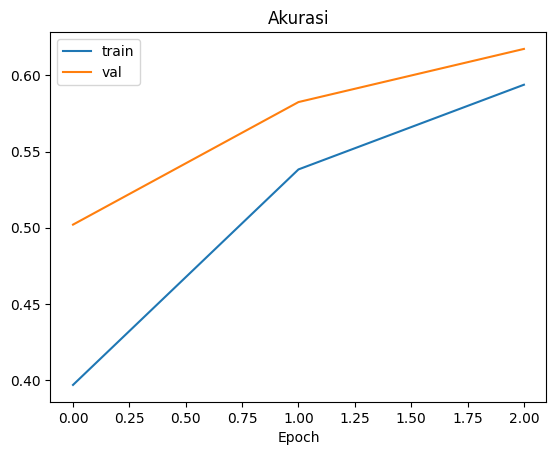

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Ambil dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Cek ukuran dataset
print("Train data:", x_train.shape)
print("Test data:", x_test.shape)

# Normalisasi (opsional)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train[..., None]
x_test = x_test[..., None]

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist_cifar= model.fit(x_train, y_train, epochs = 3, batch_size = 128, validation_data = (x_test, y_test))

# Evaluasi
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot Akurasi
plt.figure(); plt.plot(hist_cifar.history['accuracy']); plt.plot(hist_cifar.history['val_accuracy']); plt.title('Akurasi'); plt.xlabel('Epoch'); plt.legend(['train', 'val']); plt.show()

In [15]:
# Simpan hasil training dari ketiga dataset
results = {
    'MNIST': {
        'train_acc': hist_mnist.history['accuracy'][-1],
        'val_acc': hist_mnist.history['val_accuracy'][-1],
        'train_loss': hist_mnist.history['loss'][-1],
        'val_loss': hist_mnist.history['val_loss'][-1]
    },
    'Fashion-MNIST': {
        'train_acc': hist_fashion.history['accuracy'][-1],
        'val_acc': hist_fashion.history['val_accuracy'][-1],
        'train_loss': hist_fashion.history['loss'][-1],
        'val_loss': hist_fashion.history['val_loss'][-1]
    },
    'CIFAR-10': {
        'train_acc': hist_cifar.history['accuracy'][-1],
        'val_acc': hist_cifar.history['val_accuracy'][-1],
        'train_loss': hist_cifar.history['loss'][-1],
        'val_loss': hist_cifar.history['val_loss'][-1]
    }
}

In [27]:
import pandas as pd

df_results = pd.DataFrame(results).T
print("\n=== Perbandingan Metrik CNN ===")
print(df_results.round(4))


=== Perbandingan Metrik CNN ===
               train_acc  val_acc  train_loss  val_loss
MNIST             0.9870   0.9894      0.0433    0.0323
Fashion-MNIST     0.8815   0.8760      0.3315    0.3436
CIFAR-10          0.5939   0.6174      1.1518    1.1020


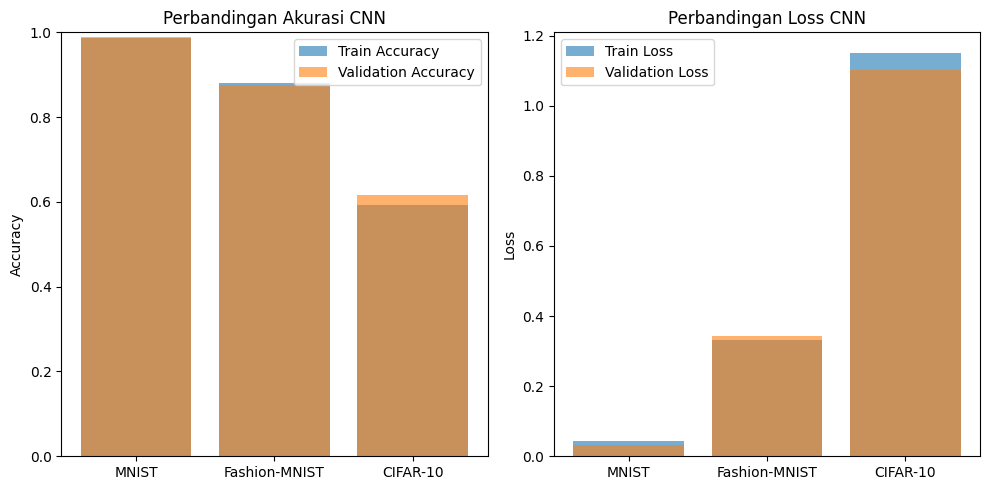

In [28]:
import matplotlib.pyplot as plt

datasets = list(results.keys())
train_acc = [results[d]['train_acc'] for d in datasets]
val_acc = [results[d]['val_acc'] for d in datasets]
train_loss = [results[d]['train_loss'] for d in datasets]
val_loss = [results[d]['val_loss'] for d in datasets]

plt.figure(figsize=(10,5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(datasets, train_acc, alpha=0.6, label='Train Accuracy')
plt.bar(datasets, val_acc, alpha=0.6, label='Validation Accuracy')
plt.title('Perbandingan Akurasi CNN')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.bar(datasets, train_loss, alpha=0.6, label='Train Loss')
plt.bar(datasets, val_loss, alpha=0.6, label='Validation Loss')
plt.title('Perbandingan Loss CNN')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()